In [1]:
from __future__ import print_function
%matplotlib inline
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd

Using Theano backend.


In [2]:
input = open('urls_h.pkl', 'rb')
urls = pickle.load(input)
input.close()
print (len(urls))

5829507


In [3]:
joined_url_list = []
list_urls=[]
for url in tqdm(urls):
    if str(url[1]).startswith('http'):
        joined_url_list.append(url[1])
        list_urls.append(url[1])
chars = set(''.join(joined_url_list))
print('total chars:', len(chars))

char_indices = dict((c, i) for i, c in enumerate(chars))

100%|██████████| 5829507/5829507 [00:07<00:00, 806524.64it/s]

total chars: 208


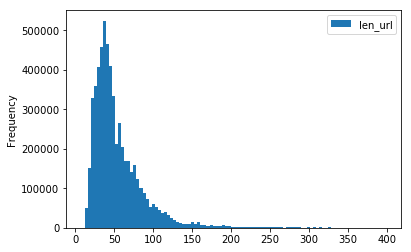

In [88]:
df = pd.DataFrame(list_urls, columns={'url'})
df['len_url'] = df['url'].apply(lambda x: len(x))
plt.figure()
df[df['len_url']<400].plot.hist(bins=100)

In [4]:
maxlen = 100
seq = []
class_ag = []
for u in tqdm(urls):
    u_str = u[1]
    u_id = u[0]
    u_cl = u[2]
    if str(u_str).startswith('http'):
        if len(u_str) > 100:
            u_0 = u_str[0:99]
        else:
            u_0 = u_str + str((100 - len(u_str))*'0')
        seq.append(u_0)
        class_ag.append(u[2])
        
class_indices = dict((c, i) for i, c in enumerate(set(class_ag)))
print('number of sequences:', len(seq))

100%|██████████| 5829507/5829507 [00:14<00:00, 399325.39it/s]

number of sequences: 5829507


In [5]:
print('Vectorization...')
X = np.zeros((len(seq[:3000000]), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(seq[:3000000]), len(chars)), dtype=np.bool)
for i, s in enumerate(seq[:2999999]):
    for t, char in enumerate(s):
        X[i, t, char_indices[char]] = 1
    y[i, class_indices[class_ag[i]]] = 1

Vectorization...


In [6]:
# build the model: 2 stacked LSTM
print('Build model...')
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(maxlen, len(chars))))
model.add(Dropout(0.2))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

Build model...


OSError: [Errno 12] Cannot allocate memory

In [ ]:
def sample(a, temperature=1.0):
    # helper function to sample an index from a probability array
    a = np.log(a) / temperature 
    dist = np.exp(a)/np.sum(np.exp(a)) 
    choices = range(len(a)) 
    
    return np.random.choice(choices, p=dist)

In [ ]:
# train the model, output generated text after each iteration
for iteration in range(1, 2):
    print()
    print('-' * 50)
    print('Iteration', iteration)
    model.fit(X, y, batch_size=128, nb_epoch=1)

    #start_index = random.randint(0, len() - maxlen - 1)